In [69]:
import nltk
from nltk import Text, FreqDist
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.font_manager as fm
from nltk import Text
from nltk.corpus import stopwords, wordnet
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

In [70]:
with open("data_pet_csv/happy_puppy_info.csv",encoding='UTF-8') as f:
    dog_data = f.read()

In [71]:
dog_list = nltk.sent_tokenize(dog_data)
print(type(dog_list), len(dog_list))

<class 'list'> 1584


In [72]:
dog_list[:5]

['Rank,Breed,Img_src,Breed_info\n1,French-Bulldog,https://www.akc.org/wp-content/uploads/2017/11/French-Bulldog-Illo-2.jpg,"The one-of-a-kind French Bulldog, with his large bat ears and even disposition, is one of the world\'s most popular small-dog breeds, especially among city dwellers.',
 'The Frenchie is playful, alert, adaptable, and completely irresistible.',
 "The French Bulldog resembles a Bulldog in miniature, except for the large, erect 'bat ears' that are the breed's trademark feature.",
 'The head is large and square, with heavy wrinkles rolled above the extremely short nose.',
 'The body beneath the smooth, brilliant coat is compact and muscular.']

In [73]:
txt1="Rank,Breed,Img_src,Breed_info\n1,French-Bulldog,https://www.akc.org/wp-content/uploads/2017/11/French-Bulldog-Illo-2.jpg,""The one-of-a-kind French Bulldog, with his large bat ears and even disposition, is one of the world\'s most popular small-dog breeds, especially among city dwellers."

txt2="The Frenchie is playful, alert, adaptable, and completely irresistible."

In [74]:
dog_list1 = nltk.word_tokenize(txt1)
print(dog_list1)

['Rank', ',', 'Breed', ',', 'Img_src', ',', 'Breed_info', '1', ',', 'French-Bulldog', ',', 'https', ':', '//www.akc.org/wp-content/uploads/2017/11/French-Bulldog-Illo-2.jpg', ',', 'The', 'one-of-a-kind', 'French', 'Bulldog', ',', 'with', 'his', 'large', 'bat', 'ears', 'and', 'even', 'disposition', ',', 'is', 'one', 'of', 'the', 'world', "'s", 'most', 'popular', 'small-dog', 'breeds', ',', 'especially', 'among', 'city', 'dwellers', '.']


In [75]:
dog_list2 = nltk.word_tokenize(txt2)
print(dog_list2)

['The', 'Frenchie', 'is', 'playful', ',', 'alert', ',', 'adaptable', ',', 'and', 'completely', 'irresistible', '.']


In [76]:
regex_list1 = nltk.regexp_tokenize(
    txt1, 
    r"\w+"  
)
regex_list1

['Rank',
 'Breed',
 'Img_src',
 'Breed_info',
 '1',
 'French',
 'Bulldog',
 'https',
 'www',
 'akc',
 'org',
 'wp',
 'content',
 'uploads',
 '2017',
 '11',
 'French',
 'Bulldog',
 'Illo',
 '2',
 'jpg',
 'The',
 'one',
 'of',
 'a',
 'kind',
 'French',
 'Bulldog',
 'with',
 'his',
 'large',
 'bat',
 'ears',
 'and',
 'even',
 'disposition',
 'is',
 'one',
 'of',
 'the',
 'world',
 's',
 'most',
 'popular',
 'small',
 'dog',
 'breeds',
 'especially',
 'among',
 'city',
 'dwellers']

In [77]:
regex_list2 = nltk.regexp_tokenize(txt2, r"\w+")
regex_list2

['The',
 'Frenchie',
 'is',
 'playful',
 'alert',
 'adaptable',
 'and',
 'completely',
 'irresistible']

In [78]:
tokenizer = nltk.TreebankWordTokenizer()
dg_list1 = tokenizer.tokenize(txt1)
dg_list2 = tokenizer.tokenize(txt2)

In [79]:
dg_list1

['Rank',
 ',',
 'Breed',
 ',',
 'Img_src',
 ',',
 'Breed_info',
 '1',
 ',',
 'French-Bulldog',
 ',',
 'https',
 ':',
 '//www.akc.org/wp-content/uploads/2017/11/French-Bulldog-Illo-2.jpg',
 ',',
 'The',
 'one-of-a-kind',
 'French',
 'Bulldog',
 ',',
 'with',
 'his',
 'large',
 'bat',
 'ears',
 'and',
 'even',
 'disposition',
 ',',
 'is',
 'one',
 'of',
 'the',
 'world',
 "'s",
 'most',
 'popular',
 'small-dog',
 'breeds',
 ',',
 'especially',
 'among',
 'city',
 'dwellers',
 '.']

In [80]:
print(stopwords.fileids())

['arabic', 'azerbaijani', 'basque', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [81]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [82]:
[word for word in dog_list2 if word.lower() not in stopwords.words('english')]

['Frenchie',
 'playful',
 ',',
 'alert',
 ',',
 'adaptable',
 ',',
 'completely',
 'irresistible',
 '.']

In [83]:
def tokenize_text(text):
    text = text.lower()
    sent_tokens = nltk.sent_tokenize(text)
    stop_words = stopwords.words("english")
    stop_words.extend(['although', 'unless', 'may']) 
    result_list = [] 
    for sent in sent_tokens:  
        result = nltk.regexp_tokenize(sent, r"[A-Za-z]+")
        result = [word for word in result if word not in stop_words]
        result_list.append(result)
    
    return result_list

In [84]:
result = tokenize_text(dog_data)

In [85]:
result[:10]

[['rank',
  'breed',
  'img',
  'src',
  'breed',
  'info',
  'french',
  'bulldog',
  'https',
  'www',
  'akc',
  'org',
  'wp',
  'content',
  'uploads',
  'french',
  'bulldog',
  'illo',
  'jpg',
  'one',
  'kind',
  'french',
  'bulldog',
  'large',
  'bat',
  'ears',
  'even',
  'disposition',
  'one',
  'world',
  'popular',
  'small',
  'dog',
  'breeds',
  'especially',
  'among',
  'city',
  'dwellers'],
 ['frenchie', 'playful', 'alert', 'adaptable', 'completely', 'irresistible'],
 ['french',
  'bulldog',
  'resembles',
  'bulldog',
  'miniature',
  'except',
  'large',
  'erect',
  'bat',
  'ears',
  'breed',
  'trademark',
  'feature'],
 ['head',
  'large',
  'square',
  'heavy',
  'wrinkles',
  'rolled',
  'extremely',
  'short',
  'nose'],
 ['body', 'beneath', 'smooth', 'brilliant', 'coat', 'compact', 'muscular'],
 ['bright', 'affectionate', 'frenchie', 'charmer'],
 ['dogs',
  'words',
  'frenchies',
  'bark',
  'much',
  'alertness',
  'makes',
  'excellent',
  'watchdo

In [86]:
print(result[0])
print(result[ : 10])

['rank', 'breed', 'img', 'src', 'breed', 'info', 'french', 'bulldog', 'https', 'www', 'akc', 'org', 'wp', 'content', 'uploads', 'french', 'bulldog', 'illo', 'jpg', 'one', 'kind', 'french', 'bulldog', 'large', 'bat', 'ears', 'even', 'disposition', 'one', 'world', 'popular', 'small', 'dog', 'breeds', 'especially', 'among', 'city', 'dwellers']
[['rank', 'breed', 'img', 'src', 'breed', 'info', 'french', 'bulldog', 'https', 'www', 'akc', 'org', 'wp', 'content', 'uploads', 'french', 'bulldog', 'illo', 'jpg', 'one', 'kind', 'french', 'bulldog', 'large', 'bat', 'ears', 'even', 'disposition', 'one', 'world', 'popular', 'small', 'dog', 'breeds', 'especially', 'among', 'city', 'dwellers'], ['frenchie', 'playful', 'alert', 'adaptable', 'completely', 'irresistible'], ['french', 'bulldog', 'resembles', 'bulldog', 'miniature', 'except', 'large', 'erect', 'bat', 'ears', 'breed', 'trademark', 'feature'], ['head', 'large', 'square', 'heavy', 'wrinkles', 'rolled', 'extremely', 'short', 'nose'], ['body', 

In [87]:
def tokenize_text(dog_data):
    # 문자열로 변환
    text = str(dog_data).lower()
    sent_tokens = nltk.sent_tokenize(text)  # 'text' 변수를 사용
    stop_words = stopwords.words("english")
    return sent_tokens 

In [88]:
dog_tokens = tokenize_text(dog_data)
dog_tokens[:10]

['rank,breed,img_src,breed_info\n1,french-bulldog,https://www.akc.org/wp-content/uploads/2017/11/french-bulldog-illo-2.jpg,"the one-of-a-kind french bulldog, with his large bat ears and even disposition, is one of the world\'s most popular small-dog breeds, especially among city dwellers.',
 'the frenchie is playful, alert, adaptable, and completely irresistible.',
 "the french bulldog resembles a bulldog in miniature, except for the large, erect 'bat ears' that are the breed's trademark feature.",
 'the head is large and square, with heavy wrinkles rolled above the extremely short nose.',
 'the body beneath the smooth, brilliant coat is compact and muscular.',
 'the bright, affectionate frenchie is a charmer.',
 "dogs of few words, frenchies don't bark much, but their alertness makes them excellent watchdogs.",
 'they happily adapt to life with singles, couples, or families, and do not require a lot of outdoor exercise.',
 'they get on well with other animals and enjoy making new frie

In [89]:
dog_words = []
for sent in dog_tokens:
    word_tokens = nltk.word_tokenize(sent)
    dog_words += word_tokens

dog_words[:10]

['rank',
 ',',
 'breed',
 ',',
 'img_src',
 ',',
 'breed_info',
 '1',
 ',',
 'french-bulldog']

In [90]:
dog_text = Text(dog_words, name="견종소개 단어 빈도수")
dog_text

<Text: 견종소개 단어 빈도수>

In [91]:
print(dog_text[0])
print(dog_text[ : 10])

rank
['rank', ',', 'breed', ',', 'img_src', ',', 'breed_info', '1', ',', 'french-bulldog']


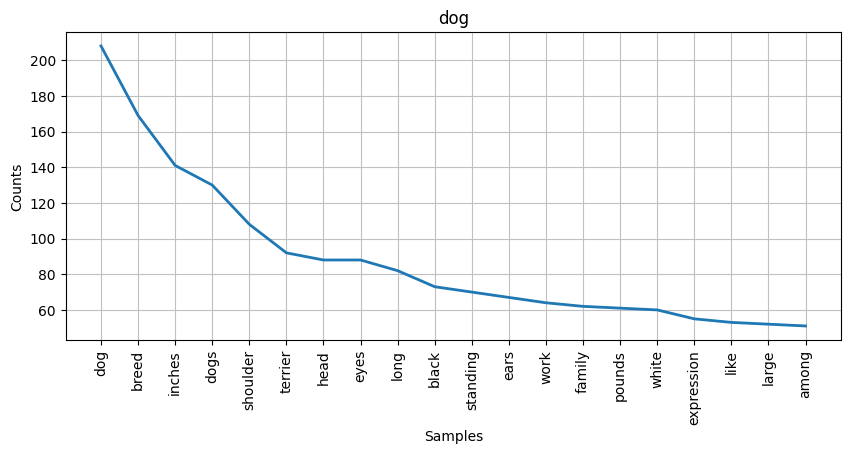

In [92]:
stop_words = stopwords.words("english")
dog_words = []
for sent in dog_tokens:
    word_tokens = nltk.word_tokenize(sent)
    word_tokens = [word for word in word_tokens if word not in stop_words]
    dog_words += word_tokens

remove_words = ['.',',', 'their', 'as', "'s", 'for', 'in', 'with', 'to','are', 'of', 'a', 'and', 'the', 'but','"',':','coat',"'",')','(',';','"','https',"''"]

dog_words = [word for word in dog_words if word not in remove_words]


fd = nltk.FreqDist(dog_words)
plt.figure(figsize=(10,4))
plt.title("dog")
fd.plot(20) 
plt.show()

In [93]:
most_common_words = fd.most_common(10)
for word, freq in most_common_words:
    print(f'단어: {word}, 빈도: {freq}')

단어: dog, 빈도: 208
단어: breed, 빈도: 169
단어: inches, 빈도: 141
단어: dogs, 빈도: 130
단어: shoulder, 빈도: 108
단어: terrier, 빈도: 92
단어: head, 빈도: 88
단어: eyes, 빈도: 88
단어: long, 빈도: 82
단어: black, 빈도: 73


<Figure size 700x700 with 0 Axes>

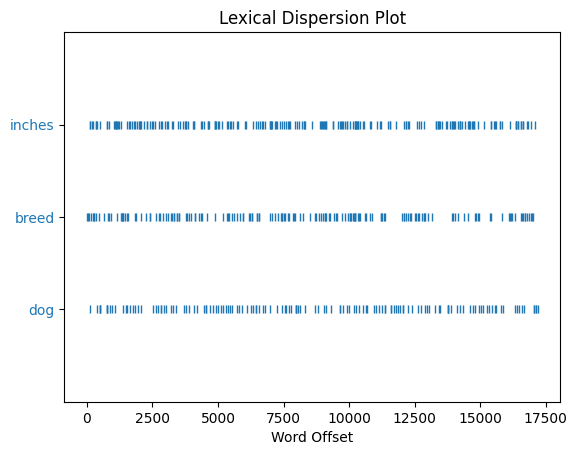

In [94]:
text = nltk.Text(dog_words)

# 분산 플롯 그리기
plt.figure(figsize=(7,7))
text.dispersion_plot(['dog', 'breed', 'inches'])

In [95]:
dog_vocab = pd.DataFrame(fd.most_common(), columns=['단어', '빈도수'])
dog_vocab.head()

,단어,빈도수
0,dog,208
1,breed,169
2,inches,141
3,dogs,130
4,shoulder,108


In [96]:
font = r"c:\Windows\Fonts\malgun.ttf"
wc = WordCloud(
    font_path=font, 
    max_font_size=50,
    min_font_size=1,
    relative_scaling=0.5)

word_cloud = wc.generate_from_frequencies(fd)

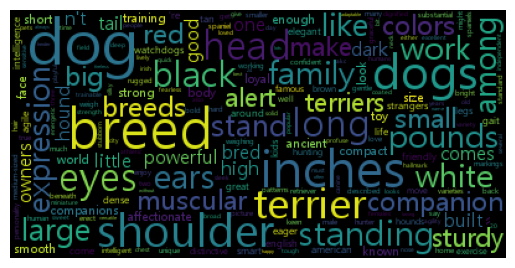

In [97]:
word_cloud.to_file('dog_wc.png')
plt.imshow(word_cloud)
plt.axis('off')
plt.show()